<a href="https://colab.research.google.com/github/Srishti-Aggarwal14/Airbnb-clone-/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9003880983182406

Classification Report:
                     precision    recall  f1-score   support

     comp.graphics       0.88      0.90      0.89       214
         rec.autos       0.89      0.92      0.90       200
           sci.med       0.93      0.90      0.92       189
talk.politics.guns       0.90      0.88      0.89       170

          accuracy                           0.90       773
         macro avg       0.90      0.90      0.90       773
      weighted avg       0.90      0.90      0.90       773



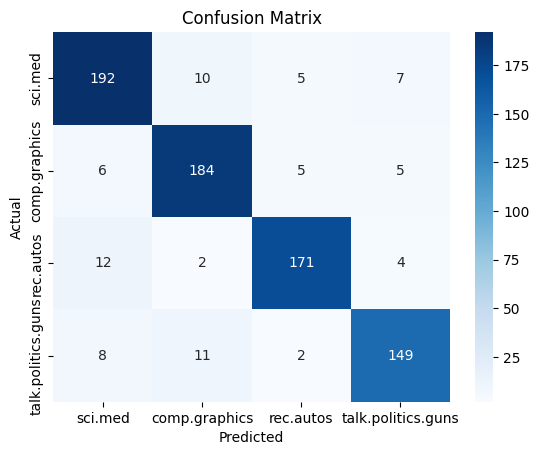

In [2]:
# Install necessary libraries if not already installed
!pip install seaborn scikit-learn pandas matplotlib

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import fetch_20newsgroups  # Use this built-in dataset

# Step 1: Load the dataset from scikit-learn
# Fetch 20 newsgroups dataset (a collection of text data)
newsgroups = fetch_20newsgroups(subset='all', categories=['sci.med', 'comp.graphics', 'rec.autos', 'talk.politics.guns'], remove=('headers', 'footers', 'quotes'))

# Data preprocessing
df = pd.DataFrame({
    'text': newsgroups.data,
    'label': newsgroups.target
})

# Map label numbers to categories for better interpretation
df['label'] = df['label'].map({0: 'sci.med', 1: 'comp.graphics', 2: 'rec.autos', 3: 'talk.politics.guns'})

# Step 2: Feature Extraction (Text to Numeric using TF-IDF Vectorizer)
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df['text']).toarray()

# Target variable (labeling different categories)
y = df['label']

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix using Seaborn
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['sci.med', 'comp.graphics', 'rec.autos', 'talk.politics.guns'], yticklabels=['sci.med', 'comp.graphics', 'rec.autos', 'talk.politics.guns'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
